In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from scripts.leitor import Leitor
from scripts.ambiente import Ambiente
from scripts.problems import MetroNew

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
config

Available objects for config:
    AliasManager
    DisplayFormatter
    HistoryManager
    IPCompleter
    IPKernelApp
    LoggingMagics
    MagicsManager
    OSMagics
    PrefilterManager
    ScriptMagics
    StoreMagics
    ZMQInteractiveShell


In [35]:
config = Leitor().loadJson('data/metroNew.json')
problem = MetroNew()
ambiente = Ambiente(config, problem)


['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'] E7 E14


In [36]:
problem.neighboors

{'E1': ['E2'],
 'E2': ['E1', 'E3', 'E9', 'E10'],
 'E3': ['E2', 'E4', 'E9', 'E13'],
 'E4': ['E3', 'E5', 'E8', 'E13'],
 'E5': ['E4', 'E6', 'E7', 'E8'],
 'E6': ['E5'],
 'E7': ['E5'],
 'E8': ['E4', 'E5', 'E9', 'E12'],
 'E9': ['E2', 'E3', 'E8', 'E11'],
 'E10': ['E2'],
 'E11': ['E9'],
 'E12': ['E8'],
 'E13': ['E3', 'E4', 'E14'],
 'E14': ['E13']}

100%|██████████| 1000/1000 [00:09<00:00, 103.14it/s]


<Axes: >

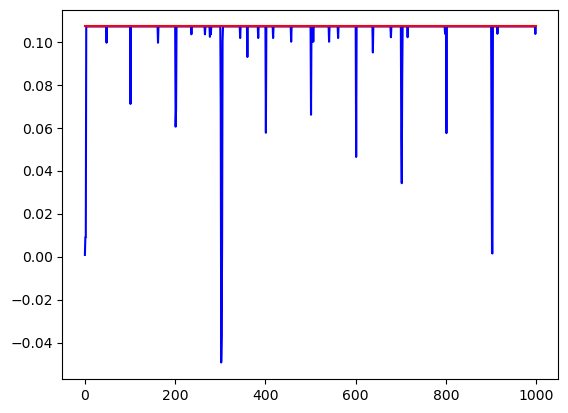

In [30]:
ambiente.run()
sns.lineplot(ambiente.results_mean,color='Blue')
sns.lineplot(ambiente.results_best,color='Red')

In [38]:
problem.distance_dataframe.max().max()

30.0

In [33]:
problem.decode(ambiente.population[1])

['E7', 'E5', 'E6']

['E7',
 'E11',
 'E13',
 'E12',
 'E10',
 'E6',
 'E2',
 'E5',
 'E8',
 'E4',
 'E9',
 'E3',
 'E14']